In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
train_path="C:\\Users\\sjkadam\\MY_FINAL_PROJECT\\MyImages\\train"
test_path="C:\\Users\\sjkadam\\MY_FINAL_PROJECT\\MyImages\\test"
val_path="C:\\Users\\sjkadam\\MY_FINAL_PROJECT\\MyImages\\valid"

In [4]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

In [5]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

In [6]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [7]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [8]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [13]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [14]:
training_set.class_indices

{'cross': 0,
 'down': 1,
 'fist': 2,
 'left': 3,
 'none': 4,
 'palm': 5,
 'right': 6,
 'scissor': 7,
 'up': 8,
 'y': 9}

In [15]:
train_y.shape,test_y.shape,val_y.shape

((3000,), (2000,), (500,))

In [16]:
vgg = VGG19(input_shape=[224, 224] + [3], weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

In [17]:
x = Flatten()(vgg.output)

In [18]:
prediction = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [25]:
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10
94/94 [==============================] - 555s 6s/step - loss: 0.2327 - accuracy: 0.9387 - val_loss: 1.1630 - val_accuracy: 0.8040
Epoch 2/10
94/94 [==============================] - 549s 6s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.1956 - val_accuracy: 0.8040
Epoch 3/10
94/94 [==============================] - 390s 4s/step - loss: 7.4869e-04 - accuracy: 1.0000 - val_loss: 1.2079 - val_accuracy: 0.8000
Epoch 4/10
94/94 [==============================] - 374s 4s/step - loss: 5.8440e-04 - accuracy: 1.0000 - val_loss: 1.1787 - val_accuracy: 0.8040
Epoch 5/10
94/94 [==============================] - 366s 4s/step - loss: 4.7182e-04 - accuracy: 1.0000 - val_loss: 1.1619 - val_accuracy: 0.8040
Epoch 6/10
94/94 [==============================] - 362s 4s/step - loss: 3.9287e-04 - accuracy: 1.0000 - val_loss: 1.2046 - val_accuracy: 0.8000
Epoch 7/10
94/94 [==============================] - 362s 4s/step - loss: 3.3081e-04 - accuracy: 1.0000 - val_loss: 1.1952 - val_accuracy: 

In [26]:
model.save("C:\\Users\\sjkadam\\MY_FINAL_PROJECT\\handgesturemodel.h5")

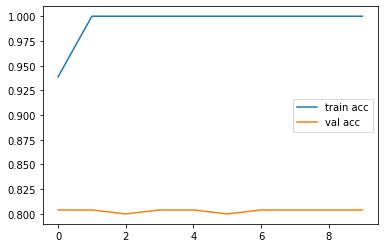

In [27]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

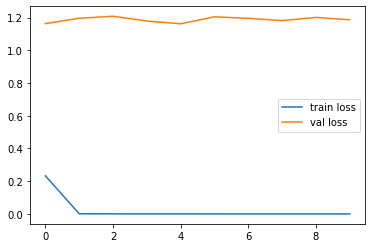

In [28]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

In [29]:
model.evaluate(test_x,test_y,batch_size=32)

63/63 [==============================] - 205s 3s/step - loss: 0.6917 - accuracy: 0.8590


[0.6917262077331543, 0.859000027179718]

In [31]:
!pip install sklearn
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.3/7.3 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 kB 3.2 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=6cab29ad693e91b5774e62232f2734ee0334bf2765f6f765f83e2499ae156271
  Stored in directory: c:\users\sjkadam\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


63/63 [==============================] - 203s 3s/step


In [32]:
#get classification report
print(classification_report(y_pred,test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.30      0.73      0.43        84
           1       1.00      1.00      1.00       200
           2       1.00      0.87      0.93       229
           3       0.99      0.96      0.98       206
           4       1.00      1.00      1.00       200
           5       0.86      1.00      0.93       173
           6       1.00      1.00      1.00       200
           7       1.00      0.47      0.64       422
           8       0.47      1.00      0.64        94
           9       0.96      1.00      0.98       192

    accuracy                           0.86      2000
   macro avg       0.86      0.90      0.85      2000
weighted avg       0.93      0.86      0.87      2000

[[ 61   0   0   0   0   0   0   0  23   0]
 [  0 200   0   0   0   0   0   0   0   0]
 [  0   0 200   2   0  27   0   0   0   0]
 [  0   0   0 198   0   0   0   0   0   8]
 [  0   0   0   0 200   0   0   0   0   0]
 [  0   0   0   0   0 173 